In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [2]:
#Importing the dataset
cancer_df= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
cancer_df.columns = ['id', 'clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

In [3]:
#Data Preprocessing and cleaning of the dataset
cancer_df = cancer_df.replace('?', np.nan).dropna()
cancer_df.drop(['id'], axis=1, inplace=True)

In [4]:
#Data Analysis
cancer_df.isnull().sum()

clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [5]:
#Describing the dataset
cancer_df.describe()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,4.441349,3.153959,3.218475,2.832845,3.236070,3.445748,2.872434,1.604106,2.700880
std,2.822751,3.066285,2.989568,2.865805,2.224214,2.451435,3.054065,1.733792,0.954916
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
#Shape of the dataset
cancer_df.shape

(682, 10)

In [7]:
#Columns in the dataset
cancer_df.columns

Index(['clump_thickness', 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [8]:
#Output variable value count
cancer_df['class'].value_counts()

2    443
4    239
Name: class, dtype: int64

In [9]:
#Preparing the training and the test dataset
X=cancer_df.drop(['class'], axis=1)
y=cancer_df['class']
#Splitting the training and the test dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy is:  97.07317073170731


<AxesSubplot:>

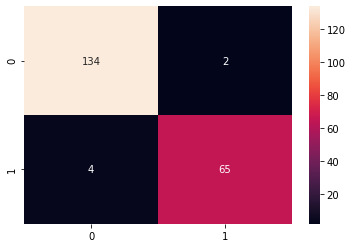

In [10]:
#Training the random forest model
random_forest_model = RandomForestClassifier()      
random_forest_model = random_forest_model.fit(x_train,y_train)
#Predicting the random forest model using the test dataset
random_forest_predict = random_forest_model.predict(x_test)
random_forest_accuracy = accuracy_score(y_test,random_forest_predict)
#Accuracy of the model
print('Accuracy is: ',100* random_forest_accuracy)
#Confusion matrix of the model
random_forest_confusion_matrix = confusion_matrix(y_test,random_forest_predict)
sns.heatmap(random_forest_confusion_matrix,annot=True,fmt="d")

In [11]:
#Evaluating the model
print(classification_report(y_test, random_forest_predict))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       136
           4       0.97      0.94      0.96        69

    accuracy                           0.97       205
   macro avg       0.97      0.96      0.97       205
weighted avg       0.97      0.97      0.97       205

